<a href="https://colab.research.google.com/github/lekejo/lekejo/blob/main/Plot%20Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

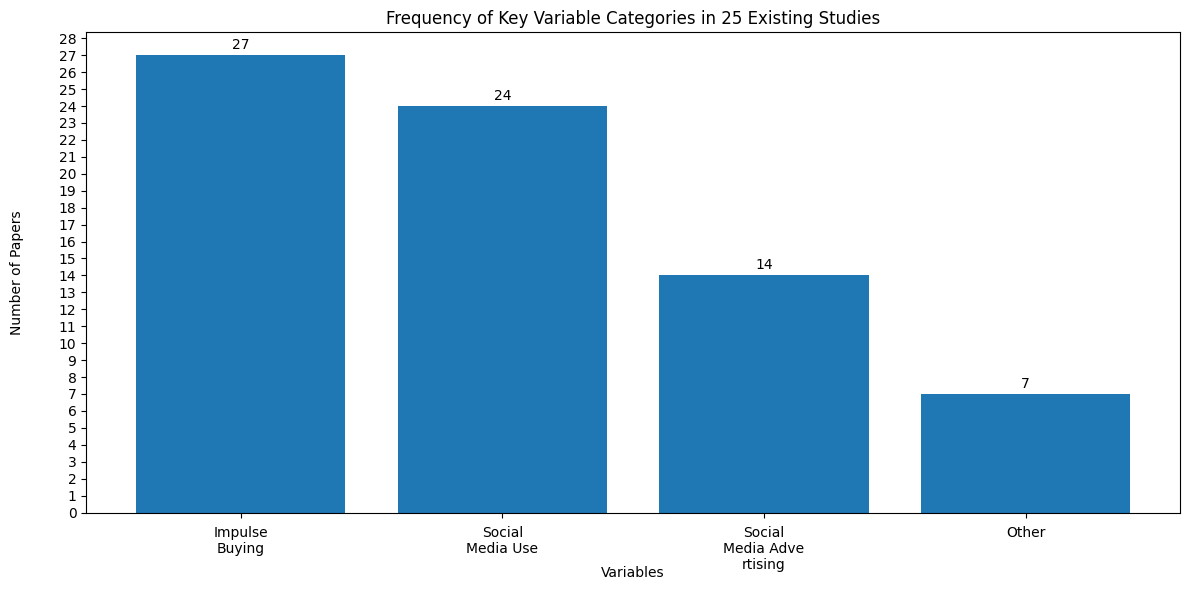

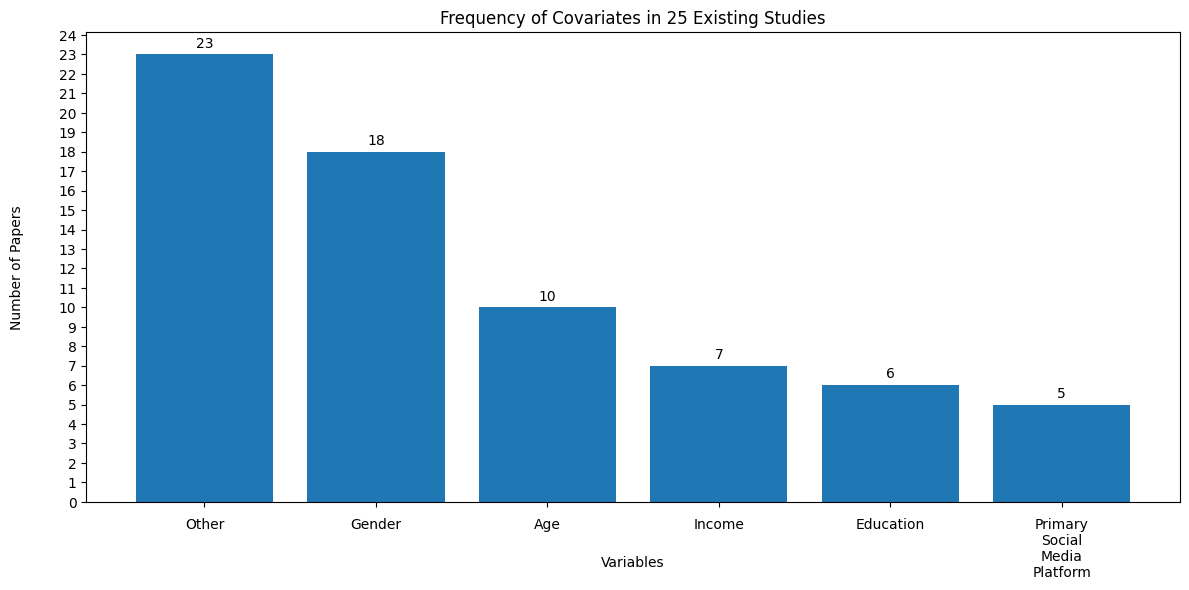

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Data for Key Variables (Grouped)
key_variable_data = {
    "Social Media Use": 24,  # Consolidated count (Social Media Use Frequency + Social Media Use Duration + Time Spent)
    "Social Media Advertising": 14,
    "Impulse Buying": 27,
    "Other": 7
}

# Data for Covariates (Grouped)
covariate_data = {
    "Gender": 18,
    "Age": 10,
    "Income": 7,
    "Education": 6,
    "Primary Social Media Platform": 5,
    "Other": 23
}

# Function to create and customize bar chart
def create_bar_chart(data, title, threshold=10):
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Count'])

    # Group variables below the threshold into "Other"
    other_count = df[df['Count'] < threshold]['Count'].sum()
    df = df[df['Count'] >= threshold]
    if other_count > 0:
        df.loc['Other'] = other_count

    df = df.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(df.index, df['Count'])
    plt.title(title)

    # Set custom y-ticks and add labels
    plt.yticks(range(0, max(df['Count']) + 2, 1))
    plt.ylabel("Number of Papers", labelpad=25)

    # Get x-tick labels AFTER grouping and sorting
    xticklabels = plt.gca().get_xticklabels()

    # Wrap and center x-axis labels, removing original text and positioning below
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom')

        original_label = xticklabels[i]
        original_label.set_visible(False)

        label_text = original_label.get_text()
        wrapped_label = textwrap.fill(label_text, 10)  # Adjust width as needed
        plt.text(bar.get_x() + bar.get_width()/2, -0.8, wrapped_label, ha='center', va='top', wrap=True)  # Position below

    # Position x-axis label "Variables" below wrapped labels
    plt.xlabel("Variables", labelpad=35)

    plt.tight_layout()
    plt.show()

# Create charts with grouping and wrapped x-axis labels
create_bar_chart(key_variable_data, "Frequency of Key Variable Categories in 25 Existing Studies")
create_bar_chart(covariate_data, "Frequency of Covariates in 25 Existing Studies", threshold=3)